# Part 1: Exploring the data

In [19]:
# --- Import Libraries --- #
import pandas as pd
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --- Read Data --- #
data = pd.read_csv('train.csv')
data.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [55]:
# Let's check out some summary statistics
data.describe()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
count,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06
mean,2.245030e+03,1.479011e+09,7.839624e+07,8.136169e+06,2.360018e+00,2.011388e+07,4.731900e-01,2.558086e-01,2.311527e+02,3.068742e-01,3.936884e-01,4.037300e+03,1.500740e+06,2.431278e+01,6.840330e-01
std,1.308979e+04,1.189935e+07,5.133633e+07,5.460090e+06,4.659856e+00,7.570138e+04,7.353008e-01,5.481663e-01,7.999463e+01,4.611968e-01,4.885672e-01,3.954754e+03,2.519546e+06,3.767797e+00,4.648999e-01
min,0.000000e+00,1.000000e+00,2.000580e+05,1.976000e+03,0.000000e+00,1.900010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00
25%,0.000000e+00,1.478460e+09,1.376614e+07,1.255566e+06,0.000000e+00,2.009123e+07,0.000000e+00,0.000000e+00,1.960000e+02,0.000000e+00,0.000000e+00,8.990000e+02,2.605000e+03,2.100000e+01,0.000000e+00
50%,3.000000e+00,1.479057e+09,9.380660e+07,9.525626e+06,1.000000e+00,2.014103e+07,0.000000e+00,0.000000e+00,2.220000e+02,0.000000e+00,0.000000e+00,2.738000e+03,1.941720e+05,2.500000e+01,1.000000e+00
75%,2.700000e+01,1.479742e+09,1.262592e+08,1.329221e+07,2.000000e+00,2.016061e+07,1.000000e+00,0.000000e+00,2.540000e+02,1.000000e+00,1.000000e+00,6.064000e+03,1.519461e+06,2.800000e+01,1.000000e+00
max,2.597310e+05,1.480636e+09,1.372601e+08,1.472086e+07,7.300000e+01,3.000010e+07,2.000000e+00,2.000000e+00,6.553500e+04,1.000000e+00,1.000000e+00,1.991700e+04,1.144741e+07,3.000000e+01,1.000000e+00


In [4]:
unique_songs = len(set(data["media_id"]))
unique_users = len(set(data["user_id"]))

print("There are %d unique songs and %d unique users" % (unique_songs, unique_users))

There are 452975 unique songs and 19918 unique users


In [8]:
import collections
counter=collections.Counter(data["media_id"])

# See the 10 most played songs
counter.most_common(10)

[(132434634, 20148),
 (133165774, 17652),
 (132123604, 16289),
 (132123626, 15131),
 (132123630, 14347),
 (129632340, 13076),
 (131576046, 12709),
 (132614858, 12394),
 (134748108, 12257),
 (133661814, 11663)]

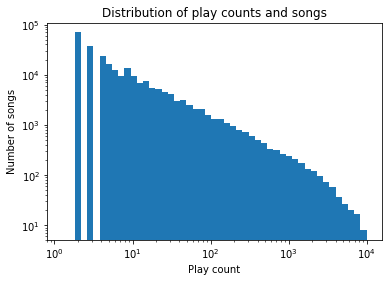

In [30]:
# Visualize the distribution of plays per song
play_counts = counter.values()
plt.hist(play_counts, bins=np.logspace(0.1, 4.0, 50), log = True)
plt.gca().set_xscale("log")
plt.xlabel("Play count")
plt.ylabel("Number of songs")
plt.title("Distribution of play counts and songs")
plt.show()

What we see in the previous graph is a log relationship - there are a few popular songs that are played very often, but most of the songs do not get played much

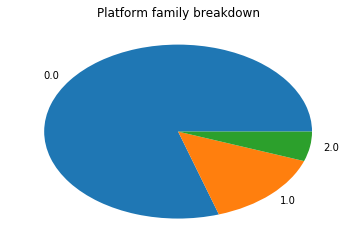

In [36]:
counter=collections.Counter(data["platform_family"])

plt.pie([float(v) for v in counter.values()], labels=[float(k) for k in counter],
           autopct=None)
plt.title("Platform family breakdown")
plt.show()

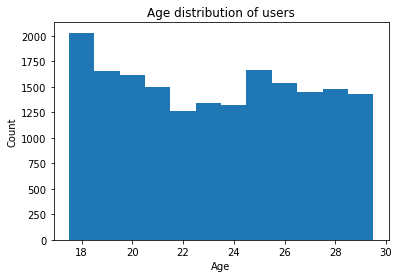

In [48]:
# We need to consider only unique users
age_data = data.drop_duplicates(subset = "user_id")

plt.hist(age_data["user_age"], bins = np.arange(17.5, 30.5, 1))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution of users")
plt.show()

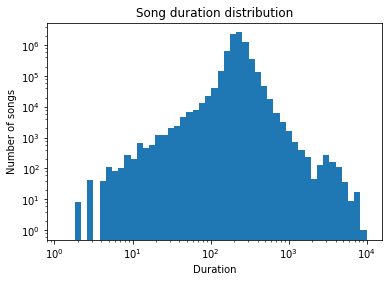

In [59]:
plt.hist(data["media_duration"], bins=np.logspace(0.1, 4.0, 50), log = True)
plt.gca().set_xscale("log")
plt.xlabel("Duration")
plt.ylabel("Number of songs")
plt.title("Song duration distribution")
plt.show()


# Part 2: Building the recommendation engine using Collaborative Filtering
I'll be trying out the tutorial from http://www.salemmarafi.com/code/collaborative-filtering-with-python/